In [1]:
from sklearn import set_config; set_config(display='diagram')


Loading dataset...
Preparing training and test sets...
Done
Stripping punctuation from text...
Stripping excess spaces, whitespaces and line breaks from text...
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/home/yiwen-h/.pyenv/versions/3.8.12/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/yiwen-h/.pyenv/versions/3.8.12/lib/python3.8/site-packages/pxtextmining/factories/factory_data_load_and_split.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['theme'] = text_data['theme'].copy()
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   2 | 

The best estimator is ComplementNB(alpha=0.1)
The best parameters are:
sampling__kw_args: {'up_balancing_counts': 300}
clf__estimator__alpha: 0.1
clf__estimator: ComplementNB(alpha=0.1)
alltrans__theme__scaler: OneHotEncoder(categories=[["Couldn't be improved", 'Access', 'Care received',
                           'Communication', 'Dignity',
                           'Environment/ facilities', 'Miscellaneous', 'Staff',
                           'Transition/coordination']])
alltrans__process__preprocessor__texttr__text__transformer__use_idf: True
alltrans__process__preprocessor__texttr__text__transformer__tokenizer: <pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f8ec64ce190>
alltrans__process__preprocessor__texttr__text__transformer__preprocessor: <function text_preprocessor at 0x7f8f3fbd0790>
alltrans__process__preprocessor__texttr__text__transformer__norm: l2
alltrans__process__preprocessor__texttr__text__transformer__ngram_range: (1, 3)
alltrans__process__preprocess

/home/yiwen-h/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Writing to disk...
CPU times: user 37.2 s, sys: 1.81 s, total: 39 s
Wall time: 34.1 s


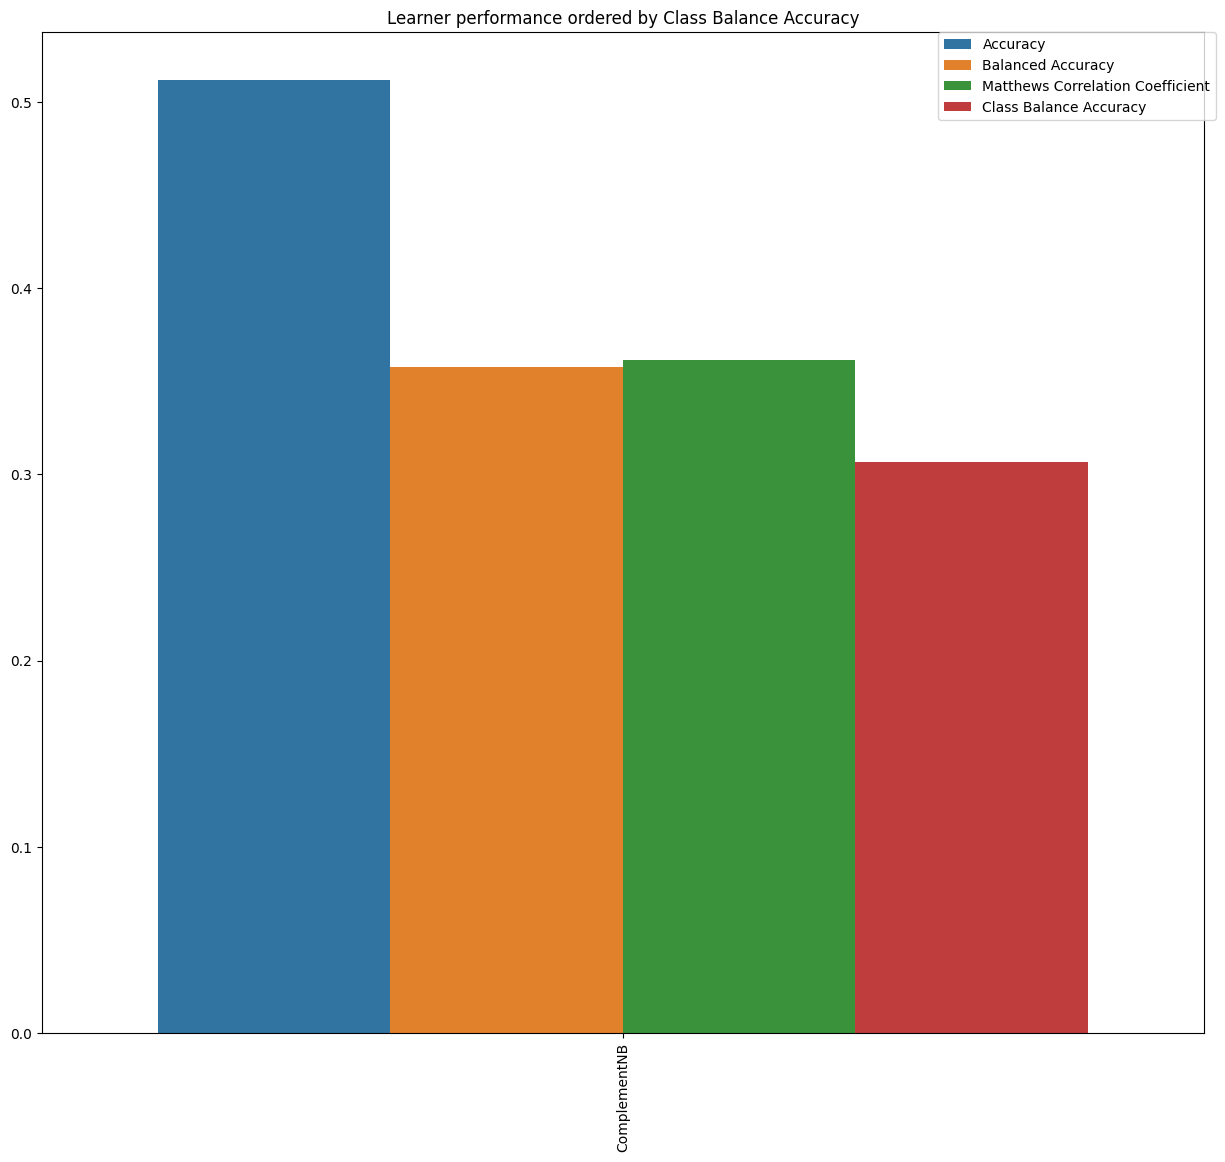

[CV] sampling__kw_args={'up_balancing_counts': 300}, clf__estimator=KNeighborsClassifier(), alltrans__theme__scaler=ThemeBinarizer(class_col='theme', target_class="Couldn't be improved"), alltrans__process__preprocessor__texttr__text__transformer__use_idf=True, alltrans__process__preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fac08a98040>, alltrans__process__preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fac059c0a60>, alltrans__process__preprocessor__texttr__text__transformer__norm=l2, alltrans__process__preprocessor__texttr__text__transformer__ngram_range=(1, 3), alltrans__process__preprocessor__texttr__text__transformer__min_df=1, alltrans__process__preprocessor__texttr__text__transformer__max_df=0.7, alltrans__process__preprocessor__texttr__text__transformer=TfidfVectorizer(), alltrans__process__preprocessor__sentimenttr__scaler__scaler__n_bins=8, alltrans__process__preprocess

/home/yiwen-h/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


[CV] sampling__kw_args={'up_balancing_counts': 300}, clf__estimator__alpha=0.1, clf__estimator=ComplementNB(), alltrans__theme__scaler=OneHotEncoder(categories=[["Couldn't be improved", 'Access', 'Care received',
                           'Communication', 'Dignity',
                           'Environment/ facilities', 'Miscellaneous', 'Staff',
                           'Transition/coordination']]), alltrans__process__preprocessor__texttr__text__transformer__use_idf=True, alltrans__process__preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fd97bd51a90>, alltrans__process__preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fd978ad31f0>, alltrans__process__preprocessor__texttr__text__transformer__norm=l2, alltrans__process__preprocessor__texttr__text__transformer__ngram_range=(1, 3), alltrans__process__preprocessor__texttr__text__transformer__min_df=1, alltrans__process__preprocessor__t

/home/yiwen-h/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [13]:
%%time

from pxtextmining.pipelines.text_classification_pipeline import text_classification_pipeline

pipe, tuning_results, pred, accuracy_per_class, p_compare_models_bar, index_train, index_test = \
    text_classification_pipeline(filename='../datasets/text_data.csv', target="criticality", predictor="feedback",
                                 test_size=0.33,
                                 ordinal=True,
                                 tknz="spacy",
                                 metric="class_balance_accuracy",
                                 cv=2, n_iter=1, n_jobs=5, verbose=3,
                                 learners=[
                                     "SGDClassifier",
                                     "RidgeClassifier",
                                     "Perceptron",
                                     "PassiveAggressiveClassifier",
                                     "BernoulliNB",
                                     "ComplementNB",
                                     "MultinomialNB",
                                     "KNeighborsClassifier",
                                     "NearestCentroid",
                                     "RandomForestClassifier"
                                     ],
                                 objects_to_save=[
                                     "pipeline",
                                     "tuning results",
                                     "predictions",
                                     "accuracy per class",
                                     "index - training data",
                                     "index - test data",
                                     "bar plot"
                                 ],
                                 save_objects_to_server=False,
                                 save_objects_to_disk=True,
                                 save_pipeline_as="pipeline_criticality_issue_26",
                                 results_folder_name="results_criticality_issue_26",
                                 reduce_criticality=True,
                                 theme="label")

In [3]:
import pandas as pd

test_data = pd.read_csv('../datasets/text_data.csv')
test_data.head()

,code,label,subcategory,feedback,criticality,organization,question,row_index
0,xn,Couldn't be improved,Nothing to improve,Nothing.,3,Trust A,Trust A - Q1,0
1,ee,Environment/ facilities,Environment/ facilities,Temperature in theatre a little low.,-1,Trust A,Trust A - Q1,1
2,ap,Access,Provision of services,Same service available at Bingham Health Centre.,-2,Trust A,Trust A - Q1,2
3,mi,Communication,Amount/clarity of information,Appointment details given over phone - no phys...,-1,Trust A,Trust A - Q1,3
4,mm,Communication,Communication,On one occasion I was not made aware that my a...,-3,Trust A,Trust A - Q1,4


In [4]:
test_data.shape

(10334, 8)

In [6]:
pipe

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('sampling',
                                              FunctionSampler(func=<function random_over_sampler_data_generator at 0x7f8f3aca14c0>,
                                                              kw_args={'random_state': 0,
                                                                       'threshold': 200,
                                                                       'up_balancing_counts': 300},
                                                              validate=False)),
                                             ('alltrans',
                                              ColumnTransformer(transformers=[('theme',
                                                                               ScalerSwitcher(),
                                                                               ['theme']),
                                                                              ('process',
                                                                               Pipeline(steps=[('preprocess...
                                         'sampling__kw_args': [{'up_balancing_counts': 300},
                                                               {'up_balancing_counts': 800}]}],
                   refit='Class Balance Accuracy',
                   scoring={'Accuracy': make_scorer(accuracy_score),
                            'Balanced Accuracy': make_scorer(balanced_accuracy_score),
                            'Class Balance Accuracy': make_scorer(class_balance_accuracy_score),
                            'Matthews Correlation Coefficient': make_scorer(matthews_corrcoef)},
                   verbose=3)

In [7]:
tuning_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_sampling__kw_args,param_clf__estimator,param_alltrans__theme__scaler,param_preprocessor__texttr__text__transformer__use_idf,param_preprocessor__texttr__text__transformer__tokenizer,param_preprocessor__texttr__text__transformer__preprocessor,...,split1_test_Matthews Correlation Coefficient,mean_test_Matthews Correlation Coefficient,std_test_Matthews Correlation Coefficient,rank_test_Matthews Correlation Coefficient,split0_test_Class Balance Accuracy,split1_test_Class Balance Accuracy,mean_test_Class Balance Accuracy,std_test_Class Balance Accuracy,rank_test_Class Balance Accuracy,learner
0,5.258911,0.204075,7.960977,0.117891,{'up_balancing_counts': 300},KNeighborsClassifier(),"ThemeBinarizer(class_col='theme', target_class...",True,<pxtextmining.helpers.tokenization.LemmaTokeni...,<function text_preprocessor at 0x7f8f3fbd0790>,...,0.24055,0.242607,0.002057,1,0.235717,0.214835,0.225276,0.010441,1,KNeighborsClassifier


In [8]:
pred

,criticality_pred,row_index
0,2,6571
1,0,5455
2,0,4472
3,0,5410
4,3,3695
...,...,...
3394,0,1303
3395,3,1149
3396,-4,5003
3397,3,9672


In [9]:
accuracy_per_class

,class,counts,accuracy
0,-1,76,0.144737
1,-2,202,0.079208
2,-3,260,0.219231
3,-4,64,0.531250
4,0,847,0.409681
5,1,93,0.279570
6,2,348,0.183908
7,3,1218,0.716749
8,4,291,0.085911


In [10]:
p_compare_models_bar

<AxesSubplot:title={'center':'Learner performance ordered by Class Balance Accuracy'}>

In [11]:
pipe

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('sampling',
                                              FunctionSampler(func=<function random_over_sampler_data_generator at 0x7f8f3aca14c0>,
                                                              kw_args={'random_state': 0,
                                                                       'threshold': 200,
                                                                       'up_balancing_counts': 300},
                                                              validate=False)),
                                             ('alltrans',
                                              ColumnTransformer(transformers=[('theme',
                                                                               ScalerSwitcher(),
                                                                               ['theme']),
                                                                              ('process',
                                                                               Pipeline(steps=[('preprocess...
                                         'sampling__kw_args': [{'up_balancing_counts': 300},
                                                               {'up_balancing_counts': 800}]}],
                   refit='Class Balance Accuracy',
                   scoring={'Accuracy': make_scorer(accuracy_score),
                            'Balanced Accuracy': make_scorer(balanced_accuracy_score),
                            'Class Balance Accuracy': make_scorer(class_balance_accuracy_score),
                            'Matthews Correlation Coefficient': make_scorer(matthews_corrcoef)},
                   verbose=3)

In [17]:
pipe.__dict__

{'param_distributions': [{'sampling__kw_args': [{'up_balancing_counts': 300},
    {'up_balancing_counts': 800}],
   'clf__estimator': [MultinomialNB()],
   'alltrans__theme__scaler': [OneHotEncoder(categories=[["Couldn't be improved", 'Access', 'Care received',
                               'Communication', 'Dignity',
                               'Environment/ facilities', 'Miscellaneous', 'Staff',
                               'Transition/coordination']]),
    ThemeBinarizer(class_col='theme', target_class="Couldn't be improved")],
   'clf__estimator__alpha': (0.1, 0.5, 1),
   'alltrans__process__featsel__selector': [SelectPercentile(percentile=100, score_func=<function chi2 at 0x7f8f3fbb9b80>)],
   'alltrans__process__featsel__selector__percentile': [70, 85, 100],
   'alltrans__process__featsel__selector__score_func': [<function sklearn.feature_selection._univariate_selection.chi2(X, y)>],
   'alltrans__process__preprocessor__sentimenttr__scaler__scaler': [KBinsDiscretizer(strate

In [80]:
from imblearn import FunctionSampler
from imblearn.pipeline import Pipeline
# from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score, matthews_corrcoef
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, chi2, f_classif
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from pxtextmining.helpers.text_preprocessor import text_preprocessor
from pxtextmining.helpers.sentiment_scores import sentiment_scores
from pxtextmining.helpers.text_length import text_length
from pxtextmining.helpers.tokenization import LemmaTokenizer
from pxtextmining.helpers.word_vectorization import EmbeddingsTransformer
from pxtextmining.helpers.oversampling import random_over_sampler_data_generator
from pxtextmining.helpers.metrics import class_balance_accuracy_score
from pxtextmining.helpers.estimator_switcher import ClfSwitcher
from pxtextmining.helpers.ordinal_classification import OrdinalClassifier
from pxtextmining.helpers.scaler_switcher import ScalerSwitcher
from pxtextmining.helpers.feature_selection_switcher import FeatureSelectionSwitcher
from pxtextmining.helpers.text_transformer_switcher import TextTransformerSwitcher
from pxtextmining.helpers.theme_binarization import ThemeBinarizer

def factory_pipeline_preproc_only(x, y, tknz="spacy",
                     ordinal=False,
#                      metric="class_balance_accuracy_score",
#                      cv=5, n_iter=100, n_jobs=5, verbose=3,
#                      learners=[
#                          "SGDClassifier",
#                          "RidgeClassifier",
#                          "Perceptron",
#                          "PassiveAggressiveClassifier",
#                          "BernoulliNB",
#                          "ComplementNB",
#                          "MultinomialNB",
#                          # "KNeighborsClassifier",
#                          # "NearestCentroid",
#                          "RandomForestClassifier"
#                      ],
                     theme=None
                                 ):

    features_text = 'predictor'

    # Define transformers for pipeline #
    # Transformer that calculates text length and transforms it.
    transformer_text_length = Pipeline(steps=[
        ('length', (FunctionTransformer(text_length))),
        ('scaler', (ScalerSwitcher()))
    ])

    # Transformer that calculates sentiment indicators (e.g. TextBlob, VADER) and transforms them.
    transformer_sentiment = Pipeline(steps=[
        ('sentiment', (FunctionTransformer(sentiment_scores))),
        ('scaler', (ScalerSwitcher()))
    ])

    # Transformer that converts text to Bag-of-Words or embeddings.
    transformer_text = Pipeline(steps=[
        ('text', (TextTransformerSwitcher()))
    ])

    # Gather transformers.
    preprocessor = ColumnTransformer(
        transformers=[
            ('sentimenttr', transformer_sentiment, features_text),
            ('lengthtr', transformer_text_length, features_text),
            ('texttr', transformer_text, features_text)])

    # Up-sampling step #
    oversampler = FunctionSampler(func=random_over_sampler_data_generator,
                                  kw_args={'threshold': 200,
                                           'up_balancing_counts': 300,
                                           'random_state': 0},
                                  validate=False)

    # Make pipeline #
    if ordinal and theme is not None:
        # This is for internal use by Nottinghamshire Healthcare NHS Foundation Trust or other trusts that use theme
        # labels ("Access", "Environment/ facilities" etc.). We want the criticality for "Couldn't be improved" to
        # always be "3". The theme label is passed as a one-hot encoded set of columns (or as a "binarized" column where
        # 1 is for "Couldn't be improved" and 0 is for everything else) of which the first is for # "Couldn't be
        # improved". The one-hot encoded columns (or the binarized column) are (is) actually the first column(s) of the
        # whole sparse matrix that has the TF-IDFs, sentiment features etc. that is produced when fitting by the
        # pipeline. When running the ordinal classification model, we want to find the records with "Couldn't be
        # improved" (i.e. records with a value of 1) in the first column and replace the predicted criticality values
        # with "3".
        # When one-hot encoded, we pass all of the theme's columns into the model, so we handle them separately from
        # text predictor to avoid the feature selection step for them. We thus make a separate pipeline with the
        # preprocessor and feature selection steps for the text predictor (pipe_all_but_theme) and one-hot encode the
        # theme column in all_transforms. We want to place "Couldn't be improved" in position 0 (first column) of the
        # thus produced sparse matrix so as to easily access it in the code for the ordinal model (OrdinalClassifier()).
        pipe_all_but_theme = Pipeline([
            ('preprocessor', preprocessor),
            ('featsel', FeatureSelectionSwitcher())
        ])

        all_transforms = ColumnTransformer([
            ('theme', ScalerSwitcher(), ['theme']), # Try out OneHotEncoder() or ThemeBinarizer().
            ('process', pipe_all_but_theme, [features_text])
        ])

        pipe = Pipeline([
            ('sampling', oversampler),
            ('alltrans', all_transforms),
            ('clf', OrdinalClassifier(theme='theme', target_class_value='3', theme_class_value=1))
        ])
    elif ordinal and theme is None:
        pipe = Pipeline([
            ('sampling', oversampler),
            ('preprocessor', preprocessor),
            ('featsel', FeatureSelectionSwitcher()),
#             ('clf', OrdinalClassifier())
        ])
    else:
        pipe = Pipeline([
            ('sampling', oversampler),
            ('preprocessor', preprocessor),
            ('featsel', FeatureSelectionSwitcher()),
#             ('clf', ClfSwitcher())
        ])
        
            
    return pipe
        
#     # Define (hyper)parameter grid #
#     # A few initial value ranges for some (hyper)parameters.
#     param_grid_preproc = {
#         'sampling__kw_args': [{'threshold': 100}, {'threshold': 200}],
#         'sampling__kw_args': [{'up_balancing_counts': 300}, {'up_balancing_counts': 800}],
#         'clf__estimator': None,
#         'preprocessor__sentimenttr__scaler__scaler': None,
#         'preprocessor__lengthtr__scaler__scaler': None,
#         'preprocessor__texttr__text__transformer': None,
#         'featsel__selector': [SelectPercentile()],
#         'featsel__selector__percentile': [70, 85, 100]
#     }

#     if ordinal and theme is not None:
#         param_grid_preproc['alltrans__theme__scaler'] = None


#     # If a single model is passed as a string, convert to list
#     if isinstance(learners, str):
#         learners = [learners]

#     # Just in case user has supplied the same learner more than once
#     learners = list(set(learners))

#     # For Frank and Hall's (2001) ordinal method to work, we need models that can calculate probs/scores.
#     if ordinal:
#         learners = [lrn for lrn in learners if lrn not in ["RidgeClassifier", "Perceptron",
#                                                            "PassiveAggressiveClassifier", "NearestCentroid"]]

#     # Replace learner name with learner class in 'learners' function argument.
#     for i in learners:
#         if i in "SGDClassifier":
#             learners[learners.index(i)] = SGDClassifier()
#         if i in "RidgeClassifier":
#             learners[learners.index(i)] = RidgeClassifier()
#         if i in "Perceptron":
#             learners[learners.index(i)] = Perceptron()
#         if i in "PassiveAggressiveClassifier":
#             learners[learners.index(i)] = PassiveAggressiveClassifier()
#         if i in "BernoulliNB":
#             learners[learners.index(i)] = BernoulliNB()
#         if i in "ComplementNB":
#             learners[learners.index(i)] = ComplementNB()
#         if i in "MultinomialNB":
#             learners[learners.index(i)] = MultinomialNB()
#         if i in "KNeighborsClassifier":
#             learners[learners.index(i)] = KNeighborsClassifier()
#         if i in "NearestCentroid":
#             learners[learners.index(i)] = NearestCentroid()
#         if i in "RandomForestClassifier":
#             learners[learners.index(i)] = RandomForestClassifier()

#     # Further populate (hyper)parameter grid.
#     # NOTE ABOUT PROCESS BELOW:
#     # Use TfidfVectorizer() as CountVectorizer() also, to determine if raw
#     # counts instead of frequencies improves performance. This requires
#     # use_idf=False and norm=None. We want to ensure that norm=None
#     # will not be combined with use_idf=True inside the grid search, so we
#     # create a separate parameter set to prevent this from happening. We do
#     # this below with temp list aux1.
#     # Meanwhile, we want norm='l2' (the default) for the grid defined by temp
#     # list aux. If we don't explicitly set norm='l2' in aux, the
#     # norm column in the table of the CV results (following fitting) is
#     # always empty. My speculation is that Scikit-learn does consider norm
#     # to be 'l2' for aux, but it doesn't print it. That's because unless we
#     # explicitly run aux['preprocessor__text__tfidf__norm'] = ['l2'], setting
#     # norm as 'l2' in aux is implicit (i.e. it's the default), while setting
#     # norm as None in aux1 is explicit (i.e. done by the user). But we want
#     # the colum norm in the CV results to clearly state which runs used the
#     # 'l2' norm, hence we explicitly run command
#     # aux['preprocessor__text__tfidf__norm'] = ['l2'].

#     param_grid = []
#     for i in learners:
#         for j in [TfidfVectorizer(), EmbeddingsTransformer()]:
#             aux = param_grid_preproc.copy()
#             aux['clf__estimator'] = [i]
#             aux['preprocessor__texttr__text__transformer'] = [j]
#             if ordinal and theme is not None:
#                 onehot_categories = [["Couldn't be improved", 'Access', 'Care received', 'Communication', 'Dignity',
#                                       'Environment/ facilities', 'Miscellaneous', 'Staff', 'Transition/coordination']]
#                 aux['alltrans__theme__scaler'] = \
#                     [OneHotEncoder(categories=onehot_categories), ThemeBinarizer(class_col='theme',
#                                                                                  target_class="Couldn't be improved")]

#             # if i.__class__.__name__ == LinearSVC().__class__.__name__:
#             #     aux['clf__estimator__max_iter'] = [10000]
#             #     aux['clf__estimator__class_weight'] = [None, 'balanced']
#             #     # aux['clf__estimator__dual'] = [True, False] # https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati
#             if i.__class__.__name__ == BernoulliNB().__class__.__name__:
#                 aux['clf__estimator__alpha'] = (0.1, 0.5, 1)
#             if i.__class__.__name__ == ComplementNB().__class__.__name__:
#                 aux['clf__estimator__alpha'] = (0.1, 0.5, 1)
#             if i.__class__.__name__ == MultinomialNB().__class__.__name__:
#                 aux['clf__estimator__alpha'] = (0.1, 0.5, 1)
#             if i.__class__.__name__ == SGDClassifier().__class__.__name__:
#                 aux['clf__estimator__max_iter'] = [10000]
#                 aux['clf__estimator__class_weight'] = [None, 'balanced']
#                 aux['clf__estimator__penalty'] = ('l2', 'elasticnet')
#                 if ordinal:
#                     aux['clf__estimator__loss'] = ['log']
#                 else:
#                     aux['clf__estimator__loss'] = ['hinge', 'log']
#             if i.__class__.__name__ == RidgeClassifier().__class__.__name__:
#                 aux['clf__estimator__class_weight'] = [None, 'balanced']
#                 aux['clf__estimator__alpha'] = (0.1, 1.0, 10.0)
#             if i.__class__.__name__ == Perceptron().__class__.__name__:
#                 aux['clf__estimator__class_weight'] = [None, 'balanced']
#                 aux['clf__estimator__penalty'] = ('l2', 'elasticnet')
#             if i.__class__.__name__ == RandomForestClassifier().__class__.__name__:
#                 aux['clf__estimator__max_features'] = ('sqrt', 0.666)

#             if j.__class__.__name__ == TfidfVectorizer().__class__.__name__:
#                 aux['featsel__selector__score_func'] = [chi2]
#                 aux['preprocessor__texttr__text__transformer__tokenizer'] = [LemmaTokenizer(tknz)]
#                 aux['preprocessor__texttr__text__transformer__preprocessor'] = [text_preprocessor]
#                 aux['preprocessor__texttr__text__transformer__norm'] = ['l2']
#                 aux['preprocessor__texttr__text__transformer__ngram_range'] = ((1, 3), (2, 3), (3, 3))
#                 aux['preprocessor__texttr__text__transformer__max_df'] = [0.7, 0.95]
#                 aux['preprocessor__texttr__text__transformer__min_df'] = [3, 1]
#                 aux['preprocessor__texttr__text__transformer__use_idf'] = [True, False]

#                 # The transformation is a k-means discretizer with 3 bins:
#                 #   1. The three bins represent short, medium and long text length. Reluctant to make n_bins a tunable
#                 #      parameter for efficiency reasons;
#                 #   2. Discretizing and one-hot encoding satisfies the data format requirements for Chi^2-based feature
#                 #      selection;
#                 #   3. An added benefit is that this data format is acceptable by different models, some of which may
#                 #      not be scale-invariant, while others do not accept negative or continuous values other than
#                 #      TF-IDFs;
#                 aux['preprocessor__lengthtr__scaler__scaler'] = \
#                     [KBinsDiscretizer(n_bins=3, encode='onehot', strategy='kmeans')]

#                 # The transformation is a k-means discretizer with 4 or 8 bins supplied as a tunable argument later on:
#                 #   1. The 4 bins represent weak, weak-medium, medium-strong and strong for values in [0, 1];
#                 #   2. The 8 bins represent weak, weak-medium, medium-strong and strong for values in [-1, 0] and [0, 1]
#                 #      (i.e. 8 bins for values in [-1, 1]);
#                 #   3. We also allow for the possibility of 8 bins for [0, 1] and 4 bins for [-1, 1]- no harm in trying;
#                 #   4. Discretizing and one-hot encoding satisfies the data format requirements for Chi^2-based feature
#                 #      selection;
#                 #   5. An added benefit is that this data format is acceptable by different models, some of which may
#                 #      not be scale-invariant, while others do not accept negative or continuous values other than
#                 #      TF-IDFs;
#                 aux['preprocessor__sentimenttr__scaler__scaler'] = [KBinsDiscretizer(encode='onehot', strategy='kmeans')]
#                 aux['preprocessor__sentimenttr__scaler__scaler__n_bins'] = [4, 8] # Based on the idea of having 4 (8) bins for indicators in [0, 1] ([-1, 1]), but open to trying 8 (4) for [0, 1] ([-1, 1]) too.

#                 param_grid.append(aux)

#                 aux1 = aux.copy()
#                 aux1['preprocessor__texttr__text__transformer__use_idf'] = [False]
#                 aux1['preprocessor__texttr__text__transformer__norm'] = [None]

#                 param_grid.append(aux1)

#             if j.__class__.__name__ == EmbeddingsTransformer().__class__.__name__:
#                 aux['featsel__selector__score_func'] = [f_classif]
#                 aux['preprocessor__lengthtr__scaler__scaler'] = [StandardScaler()]
#                 aux['preprocessor__sentimenttr__scaler__scaler'] = [StandardScaler()]

#                 # We don't want learners than can't handle negative data in the embeddings.
#                 if (i.__class__.__name__ == BernoulliNB().__class__.__name__) or \
#                         (i.__class__.__name__ == ComplementNB().__class__.__name__) or \
#                         (i.__class__.__name__ == MultinomialNB().__class__.__name__):
#                     aux = None

#                 param_grid.append(aux)

#     param_grid = [x for x in param_grid if x is not None]

#     # When a theme is supplied for the ordinal model, the pipeline steps are a little different. Step "alltrans"
#     # includes the steps for both the preprocessing of the text feature, and the one-hot encoding of the theme feature.
#     # So, a parameter such as "featsel__selector" in the pipeline without a theme feature would be
#     # "alltrans__process__featsel__selector" in this one. We need to pass these correct names to the tuning grid.
#     if ordinal and theme is not None:
#         ordinal_with_theme_params = [
#             'featsel__selector',
#             'featsel__selector__percentile',
#             'featsel__selector__score_func',
#             'preprocessor__sentimenttr__scaler__scaler',
#             'preprocessor__sentimenttr__scaler__scaler__n_bins',
#             'preprocessor__lengthtr__scaler__scaler',
#             'preprocessor__texttr__text__transformer',
#             'preprocessor__texttr__text__transformer__tokenizer',
#             'preprocessor__texttr__text__transformer__preprocessor',
#             'preprocessor__texttr__text__transformer__norm',
#             'preprocessor__texttr__text__transformer__ngram_range',
#             'preprocessor__texttr__text__transformer__max_df',
#             'preprocessor__texttr__text__transformer__min_df',
#             'preprocessor__texttr__text__transformer__use_idf']

#         for i in range(len(param_grid)):
#             for j in ordinal_with_theme_params:
#                 if j in param_grid[i].keys():
#                     old_key = j
#                     new_key = 'alltrans__process__' + old_key
#                     param_grid[i][new_key] = param_grid[i].pop(old_key)

#     # Define fitting metric (refit) and other useful performance metrics.
#     refit = metric.replace('_', ' ').replace(' score', '').title()
#     scoring = {'Accuracy': make_scorer(accuracy_score),
#                'Balanced Accuracy': make_scorer(balanced_accuracy_score),
#                'Matthews Correlation Coefficient': make_scorer(matthews_corrcoef),
#                'Class Balance Accuracy': make_scorer(class_balance_accuracy_score)}

#     # Define pipeline #
#     pipe_cv = RandomizedSearchCV(pipe, param_grid, n_jobs=n_jobs, return_train_score=False,
#                                  cv=cv, verbose=verbose,
#                                  scoring=scoring, refit=refit, n_iter=n_iter)

#     # These messages are for function helpers.text_preprocessor which is used by
#     # TfidfVectorizer() and EmbeddingsTransformer(). Having them inside text_preprocessor() prints
#     # them in each iteration, which is redundant. Having the here prints them once.
#     print('Stripping punctuation from text...')
#     print("Stripping excess spaces, whitespaces and line breaks from text...")

#     # Fit pipeline #
#     pipe_cv.fit(x, y)

#     return pipe_cv

In [81]:
from pxtextmining.factories.factory_data_load_and_split import factory_data_load_and_split

filename='../datasets/text_data.csv' 
target="criticality" 
predictor="feedback"
test_size=0.33
ordinal=False
tknz="spacy"
metric="class_balance_accuracy"

objects_to_save=[
 "pipeline",
 "tuning results",
 "predictions",
 "accuracy per class",
 "index - training data",
 "index - test data",
 "bar plot"
]
save_objects_to_server=False
save_objects_to_disk=True
save_pipeline_as="pipeline_criticality_issue_26"
results_folder_name="results_criticality_issue_26"
reduce_criticality=True
theme="label"

x_train, x_test, y_train, y_test, index_training_data, index_test_data = \
    factory_data_load_and_split(filename, target, predictor, test_size, reduce_criticality, theme)

pipe2 = factory_pipeline_preproc_only(x_train, y_train, tknz, ordinal = None, theme = None)


Loading dataset...
Preparing training and test sets...
Done


/home/yiwen-h/.pyenv/versions/3.8.12/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/yiwen-h/.pyenv/versions/3.8.12/lib/python3.8/site-packages/pxtextmining/factories/factory_data_load_and_split.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['theme'] = text_data['theme'].copy()


In [82]:
pipe2

Pipeline(steps=[('sampling',
                 FunctionSampler(func=<function random_over_sampler_data_generator at 0x7f8f3aca14c0>,
                                 kw_args={'random_state': 0, 'threshold': 200,
                                          'up_balancing_counts': 300},
                                 validate=False)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('sentimenttr',
                                                  Pipeline(steps=[('sentiment',
                                                                   FunctionTransformer(func=<function sentiment_scores at 0x7f8f3fbe5b80>)),
                                                                  ('scaler',
                                                                   ScalerSwitcher())]),
                                                  'predictor'),
                                                 ('lengthtr',
                                                  Pipeline(steps=[('length',
                                                                   FunctionTransformer(func=<function text_length at 0x7f8f68ea8310>)),
                                                                  ('scaler',
                                                                   ScalerSwitcher())]),
                                                  'predictor'),
                                                 ('texttr',
                                                  Pipeline(steps=[('text',
                                                                   TextTransformerSwitcher())]),
                                                  'predictor')])),
                ('featsel', FeatureSelectionSwitcher())])

In [83]:
print(pd.DataFrame(pipe2.fit_transform(x_train, y_train))[0][0])

  (0, 0)	0.5
  (0, 3)	1.0
  (0, 5)	0.49758308157099695
  (0, 6)	0.002480363786688714
  (0, 308)	1.0


In [79]:
print(x_train.predictor.iloc[0])

Can be dIffIcult and overwhelmIng at tImes to understand the nurses.
